In [1]:
from bayes_opt import BayesianOptimization
from L1_DifferentialEvolution import extract_data, model, diff_evolution
from scipy.optimize import Bounds
from scipy.optimize import minimize
# from NelderMead import bounded_nelder_mead
from NelderMead_rounded_function import rounded_nelder_mead
# from NelderMead_adaptive import adaptive_nelder_mead
# from NelderMead_adaptive2 import nelder_mead_adaptive
from losses import Losses
from matplotlib.animation import PillowWriter
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import math
import physics
import numpy as np
import matplotlib.pyplot as plt

In [2]:
frequency, intensity = extract_data() # extracting the desired information

# compressor parameters - obtained as minus the stretcher one - TO BE FIXED WITH REAL ONES ONCE THEY ARE AVAILABLE
COMPRESSOR = -1 * np.array((267.422 * 1e-24, -2.384 * 1e-36, 9.54893 * 1e-50)) # in s^2, s^3 and s^4 (SI units)
# non linearity parameter
B = 2
# cutoff frequencies, in THz, used to remove noise - derived from visual inspection
CUTOFF = (289.95, 291.91)
# model instantiation
l1_pump = model(frequency, intensity, COMPRESSOR, B, CUTOFF, num_points=int(5e3))

losses = Losses(l1_pump)

bounds_DE = Bounds(
            # GDD         # TOD          # FOD
    lb = (2.3522e-22, -1.003635e-34, 4.774465e-50),
    ub = (2.99624e-22, 9.55955e-35, 1.4323395e-49)
)

bounds_matrix = np.vstack((bounds_DE.lb, bounds_DE.ub)).T
disp_bounds = np.sort(l1_pump.translate_control(bounds_matrix, verse = "to_disp"))

In [3]:
# Define the bounds
bounds = np.array(((-5.31305788e-01, -4.17101926e-01), (-3.14772231e+08, 3.01620182e+08), (-2.55151879e+15, 1.56859005e+15)))

# Generate a random list within the bounds
random_values = [np.random.uniform(low=low, high=high) for low, high in bounds]


print(random_values)
print_progress = 1
# Run the optimization using Nelder-Mead method
optimized_solution, min_function_value, nfev, success, termination_reason, num_iterations, optimized_solutions = rounded_nelder_mead(losses.loss3, random_values, bounds, print_progress, decimal_precision1 = 3, decimal_precision2 = -5, decimal_precision3 = -13)

# Print the results
print("Optimized Solution:", optimized_solution)
print("Minimum Function Value:", min_function_value)
print("Number of Function Evaluations", nfev)
print("Success:", success)
print("Termination Reason:", termination_reason)
print("Number of Iterations:", num_iterations)

[-0.43812350958556556, 47402339.96016204, -2166405693959143.0]
iteration: 1
best value of objective function so far: 160.0065840605397
best candidate: [-4.38123510e-01  4.74023400e+07 -2.16640569e+15]
iteration: 2
best value of objective function so far: 158.05539333751085
best candidate: [-4.660e-01  2.464e+08  7.600e+14]
iteration: 3
best value of objective function so far: 83.5358910125545
best candidate: [-4.600e-01 -1.397e+08  1.570e+15]
iteration: 4
best value of objective function so far: 56.03590671798206
best candidate: [-5.02e-01  6.28e+07 -2.55e+15]
iteration: 5
best value of objective function so far: 56.03590671798206
best candidate: [-5.02e-01  6.28e+07 -2.55e+15]
iteration: 6
best value of objective function so far: 56.03590671798206
best candidate: [-5.02e-01  6.28e+07 -2.55e+15]
iteration: 7
best value of objective function so far: 45.19963863684188
best candidate: [-4.99e-01  2.86e+07  4.70e+14]
iteration: 8
best value of objective function so far: 45.19963863684188
b

iteration: 68
best value of objective function so far: 3.0519546786279856
best candidate: [-4.76e-01 -8.60e+06  6.20e+14]
iteration: 69
best value of objective function so far: 3.0519546786279856
best candidate: [-4.76e-01 -8.60e+06  6.20e+14]
iteration: 70
best value of objective function so far: 3.0519546786279856
best candidate: [-4.76e-01 -8.60e+06  6.20e+14]
iteration: 71
best value of objective function so far: 3.0519546786279856
best candidate: [-4.76e-01 -8.60e+06  6.20e+14]
iteration: 72
best value of objective function so far: 3.0519546786279856
best candidate: [-4.76e-01 -8.60e+06  6.20e+14]
iteration: 73
best value of objective function so far: 3.0519546786279856
best candidate: [-4.76e-01 -8.60e+06  6.20e+14]
iteration: 74
best value of objective function so far: 3.0519546786279856
best candidate: [-4.76e-01 -8.60e+06  6.20e+14]
iteration: 75
best value of objective function so far: 3.0519546786279856
best candidate: [-4.76e-01 -8.60e+06  6.20e+14]
iteration: 76
best value

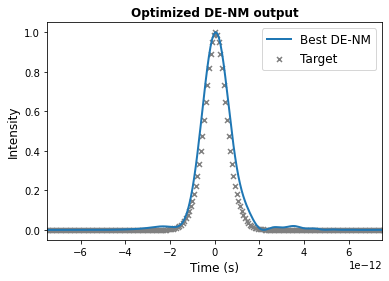

In [4]:
time, profile = l1_pump.forward_pass(optimized_solution)
fig, ax = plt.subplots()

ax.set_title("Optimized DE-NM output", fontweight = "bold")
ax.scatter(losses.target_time, losses.target_profile, marker = "x", c = "grey", s = 25, label = "Target")
ax.plot(losses.target_time, np.roll(profile, - np.argmax(profile) + np.argmax(losses.target_profile)), label = "Best DE-NM", lw = 2)

ax.set_xlim(-7.5e-12, 7.5e-12); ax.set_xlabel("Time (s)", fontsize = 12); ax.set_ylabel("Intensity", fontsize = 12)
ax.legend(fontsize = 12)
plt.show()